In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot

In [2]:
import pandas as pd

In [3]:
import uproot_methods as um

In [4]:
xs = 79310000*0.96937/(995000.)

In [5]:
f = uproot.open("/gpfs/slac/atlas/fs1/d/rafaeltl/public/L1BTag/FTAGntups/QCD/JZ0W.root")

In [6]:
t = f['bTag_AntiKt4EMTopoJets'].arrays()

In [7]:
t.keys()

dict_keys([b'runnb', b'eventnb', b'mcchan', b'mcwg', b'avgmu', b'actmu', b'PVx', b'PVy', b'PVz', b'truth_PVx', b'truth_PVy', b'truth_PVz', b'njets', b'jet_pt', b'jet_eta', b'jet_phi', b'jet_E', b'jet_m', b'jet_nConst', b'jet_dRiso', b'jet_LabDr_HadF', b'jet_aliveAfterOR', b'jet_aliveAfterORmu', b'jet_ntrk', b'jet_trk_pt', b'jet_trk_eta', b'jet_trk_phi', b'jet_trk_dr', b'jet_trk_ptfrac', b'jet_trk_ip3d_d0', b'jet_trk_ip3d_z0', b'jet_trk_ip3d_d0sig', b'jet_trk_ip3d_z0sig', b'truth_lead_jet_pt', b'truth_lead_jet_eta', b'truth_lead_jet_phi', b'truth_lead_jet_e', b'truthwz_lead_jet_pt', b'truthwz_lead_jet_eta', b'truthwz_lead_jet_phi', b'truthwz_lead_jet_e', b'avg_reco_jet_pt'])

In [8]:
jarrs = [b'jet_pt', b'jet_eta', b'jet_phi', b'jet_E', b'jet_m', b'jet_nConst', b'jet_dRiso', b'jet_LabDr_HadF', b'jet_aliveAfterOR', b'jet_aliveAfterORmu']

In [9]:
pad = {}

nentries = t[b'jet_pt'].shape[0]

for jar in jarrs:
    this_jar = str(jar, 'utf-8')
    pad[this_jar] = -99*np.ones( (nentries, 10) )

avg_jet_pt = -99*np.ones(nentries)

for i in range(0, nentries):
    njets = t[b'jet_pt'][i].shape[0]
    min_jets = min(10, njets)
        
    if njets > 0:
        avg_jet_pt[i] = 0
        max4_njets = min( 4, njets )
        for ij in range( max4_njets ):
            avg_jet_pt[i] += t[b'jet_pt'][i][ij]
        avg_jet_pt[i] = avg_jet_pt[i]/float(max4_njets)
            
        
    for jar in jarrs:
        this_jar = str(jar, 'utf-8')
        pad[this_jar][i, :min_jets] = t[jar][i, :min_jets]

clean_def = np.divide( avg_jet_pt,t[b'truth_lead_jet_pt'], where=t[b'truth_lead_jet_pt']>0, 
                      out=100.0*np.ones_like(t[b'truth_lead_jet_pt']) )
clean_cut = (clean_def < 1.6) & (clean_def > 0)

In [105]:
def calc_rate_kHz(arr, bins, range, sel):
    hh_norange = np.histogram(arr[sel], bins=bins, range=(-10000,10000), weights=t[b'mcwg'][sel]*xs)
    hh = np.histogram(arr[sel], bins=bins, range=range, weights=t[b'mcwg'][sel]*xs)
    ratio = np.sum(hh_norange[0])/np.sum(hh[0])
    cumulative = 1e-3*np.cumsum(hh[0][::-1])[::-1]*ratio
    pl_bins = 0.5*(hh[1][:-1] + hh[1][1:])
    return (pl_bins, cumulative)
    

In [111]:
rate_j0 = calc_rate_kHz( (pad['jet_pt'][:,0]*1e-3), bins=100, range=(10, 1000), sel=((pad['jet_pt'][:,0]*1e-3 > 45) & (np.abs(pad['jet_eta'][:,0]) < 2.5)))

In [112]:
rate_j1 = calc_rate_kHz( (pad['jet_pt'][:,1]*1e-3), bins=100, range=(10, 1000), sel=((pad['jet_pt'][:,0]*1e-3 > 45) &(np.abs(pad['jet_eta'][:,0]) < 2.5)))

In [113]:
rate_j2 = calc_rate_kHz( (pad['jet_pt'][:,2]*1e-3), bins=100, range=(10, 1000), sel=((pad['jet_pt'][:,0]*1e-3 > 45) &(np.abs(pad['jet_eta'][:,0]) < 2.5)))

In [114]:
rate_j3 = calc_rate_kHz( (pad['jet_pt'][:,3]*1e-3), bins=100, range=(10, 1000), sel=((pad['jet_pt'][:,0]*1e-3 > 45) &(np.abs(pad['jet_eta'][:,0]) < 2.5)))

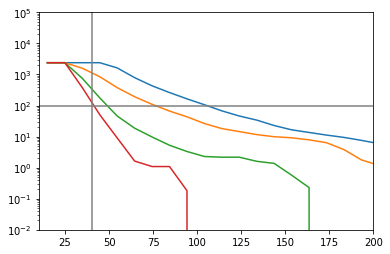

In [150]:
plt.Figure()
plt.plot(rate_j0[0], rate_j0[1])
plt.plot(rate_j1[0], rate_j1[1])
plt.plot(rate_j2[0], rate_j2[1])
plt.plot(rate_j3[0], rate_j3[1])
plt.plot([10,200], [100,100], color='gray')
plt.plot([40,40], [1e-2,1e5], color='gray')
plt.yscale('log')
plt.xlim(10,200)
plt.ylim(1e-2,1e5)
plt.show()

In [16]:
ind_ljet = ((1.8*pad['jet_pt'][:,0]*1e-3 > 45) & (np.abs(pad['jet_eta'][:,0]) < 2.5))

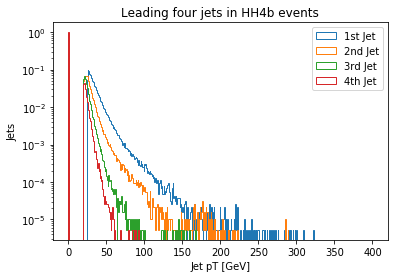

In [104]:
plt.Figure()
plt.hist( pad['jet_pt'][:,0][ind_ljet]*1e-3, histtype='step', density=1, bins=500, range=(-0.2, 400), label='1st Jet' )
plt.hist( pad['jet_pt'][:,1][ind_ljet]*1e-3, histtype='step', density=1, bins=500, range=(-0.2, 400), label='2nd Jet' )
plt.hist( pad['jet_pt'][:,2][ind_ljet]*1e-3, histtype='step', density=1, bins=500, range=(-0.2, 400), label='3rd Jet' )
plt.hist( pad['jet_pt'][:,3][ind_ljet]*1e-3, histtype='step', density=1, bins=500, range=(-0.2, 400), label='4th Jet' )
plt.legend()
plt.xlabel("Jet pT [GeV]")
plt.ylabel("Jets")
plt.title("Leading four jets in HH4b events")
plt.yscale('log')
# plt.savefig("wps/hh4b_jets.pdf")
plt.show()

In [117]:
my_jets = []
for ij in range(0,4):
    this_jet = um.TLorentzVectorArray.from_ptetaphie(pad['jet_pt'][:,ij]*1e-3, 
                                           pad['jet_eta'][:,ij], 
                                           pad['jet_phi'][:,ij], 
                                           pad['jet_E'][:,ij]*1e-3)
    my_jets.append(this_jet)

In [118]:
my_4jets = my_jets[0] + my_jets[1] + my_jets[2] + my_jets[3]

In [119]:
my_4jets.mass

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))


array([nan, nan, nan, ..., nan, nan, nan])

In [120]:
my_pt_sum = my_jets[0].pt + my_jets[1].pt + my_jets[2].pt + my_jets[3].pt

In [121]:
my_pt_sum

array([-0.396     , 19.79347656, 60.03723047, ..., -0.396     ,
       69.795375  , -0.396     ])

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


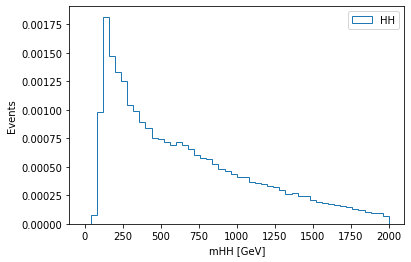

In [122]:
plt.Figure()
plt.hist( my_4jets.mass, histtype='step', density=1, bins=50, range=(0, 2000), label='HH' )
plt.legend()
plt.xlabel("mHH [GeV]")
plt.ylabel("Events")
# plt.title("Leading four jets in HH4b events")
# plt.savefig("wps/hh4b_jets.pdf")
plt.show()

In [123]:
from matplotlib.colors import LogNorm

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


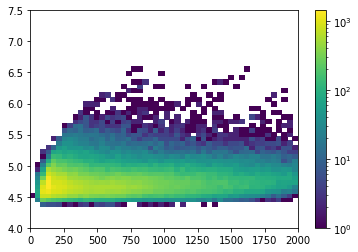

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


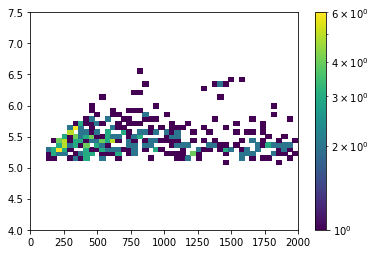

In [124]:
fig, ax = plt.subplots()
h = ax.hist2d(my_4jets.mass, np.log(my_pt_sum), bins=(50,50), range=((0,2000),(4,7.5)), norm=LogNorm())
plt.colorbar(h[3], ax=ax)
plt.show()

fig, ax = plt.subplots()
h = ax.hist2d(my_4jets.mass[my_jets[3].pt>40], np.log(my_pt_sum)[my_jets[3].pt>40], bins=(50,50), range=((0,2000),(4,7.5)), norm=LogNorm())
plt.colorbar(h[3], ax=ax)
plt.show()

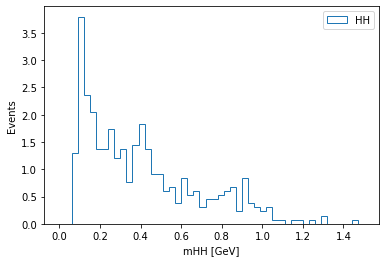

In [125]:
plt.Figure()
plt.hist(( my_pt_sum/my_4jets.mass)[my_jets[3].pt>40], histtype='step', density=1, bins=50, range=(0, 1.5), label='HH' )
plt.legend()
plt.xlabel("mHH [GeV]")
plt.ylabel("Events")
# plt.title("Leading four jets in HH4b events")
# plt.savefig("wps/hh4b_jets.pdf")
plt.show()

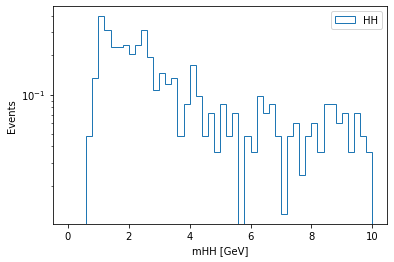

In [126]:
plt.Figure()
plt.hist(( my_4jets.mass/my_pt_sum)[my_jets[3].pt>40], histtype='step', density=1, bins=50, range=(0, 10), label='HH' )
plt.legend()
plt.xlabel("mHH [GeV]")
plt.ylabel("Events")
# plt.title("Leading four jets in HH4b events")
# plt.savefig("wps/hh4b_jets.pdf")
plt.yscale('log')
plt.show()

In [151]:
num_central_jets = 1.0*( (pad['jet_pt'][:,0]*1e-3 > 25) & (np.abs(pad['jet_eta'][:,0]) < 2.5) ) + \
                    1.0*( (pad['jet_pt'][:,1]*1e-3 > 25) & (np.abs(pad['jet_eta'][:,1]) < 2.5) ) + \
                    1.0*( (pad['jet_pt'][:,2]*1e-3 > 25) & (np.abs(pad['jet_eta'][:,2]) < 2.5) ) + \
                    1.0*( (pad['jet_pt'][:,3]*1e-3 > 25) & (np.abs(pad['jet_eta'][:,3]) < 2.5) )

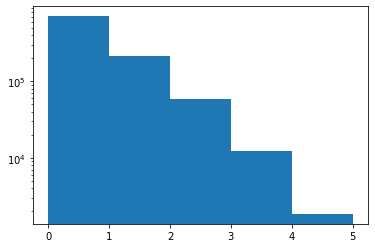

In [155]:
plt.Figure()
plt.hist(num_central_jets, bins=5, range=(0,5))
plt.yscale('log')
plt.show()

In [166]:
sel_base = ( (pad['jet_pt'][:,0]*1e-3 > 25) &
                              (pad['jet_pt'][:,1]*1e-3 > 25) &
                              (pad['jet_pt'][:,2]*1e-3 > 25) &
                              (pad['jet_pt'][:,3]*1e-3 > 25) &
                              (num_central_jets > 2)
                            )

In [167]:
rate_ht = calc_rate_kHz( my_pt_sum, bins=100, range=(10, 1000), 
                        sel=sel_base )

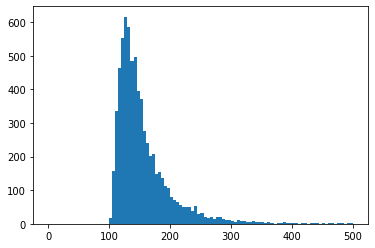

In [175]:
plt.Figure()
plt.hist(my_pt_sum[sel_base], range=(0,500), bins=100)
plt.show()

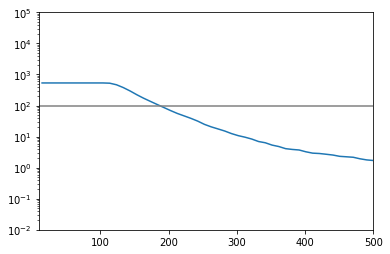

In [168]:
plt.Figure()
plt.plot(rate_ht[0], rate_ht[1])
plt.plot([10,500], [100,100], color='gray')
plt.yscale('log')
plt.xlim(10,500)
plt.ylim(1e-2,1e5)
plt.show()

In [169]:
rate_ma = calc_rate_kHz( my_4jets.mass, bins=100, range=(10, 1000), 
                        sel=sel_base )

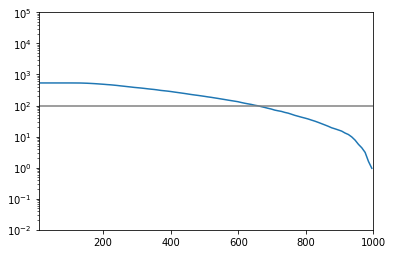

In [170]:
plt.Figure()
plt.plot(rate_ma[0], rate_ma[1])
plt.plot([10,1000], [100,100], color='gray')
plt.yscale('log')
plt.xlim(10,1000)
plt.ylim(1e-2,1e5)
plt.show()

In [171]:
rate_ra = calc_rate_kHz( my_pt_sum/my_4jets.mass, bins=100, range=(0, 2), 
                        sel=sel_base )

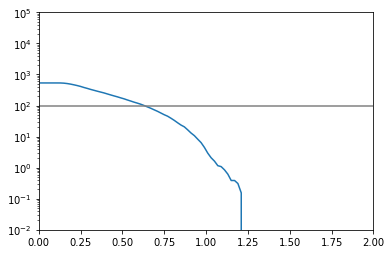

In [172]:
plt.Figure()
plt.plot(rate_ra[0], rate_ra[1])
plt.plot([0,2], [100,100], color='gray')
plt.yscale('log')
plt.xlim(0,2)
plt.ylim(1e-2,1e5)
plt.show()